In [1]:
# Importing necessary packages

from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

Task: Analyze the results of OLS and ridge regression. 
To do so, we need to plot MSE and R^2 score as functions of:
- chosen learning rates
- number of mini-batches
- number of epochs

We will compare our findings to those of scikit-learn and discuss what we see.

For regression, we also need to study the results (i.e. MSE and R^2) as functions of $\lambda$ and the learning rate $\eta$.

Adding LASSO regression is an optional addition.

**What is learning rate?**
Learning rate is ...

**What are mini-batches?**
Mini-batches are...

**What are epochs?**
Epochs are ...

Own inversion
[[4.03381041]
 [2.99521933]]
Eigenvalues of Hessian Matrix:[0.26111828 4.41179448]
theta from own gd
[[4.03381041]
 [2.99521933]]
theta from own sdg
[[3.95884669]
 [3.06498038]]


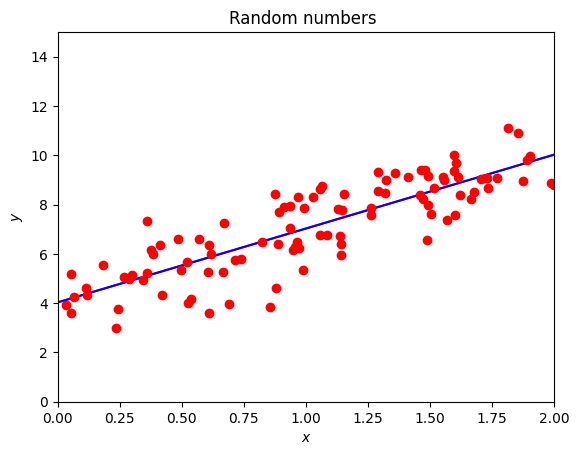

In [3]:
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()